## K-means (Python)

@Reference: Part of the code referenced or edited from source below:\
https://realpython.com/k-means-clustering-python/

### 1. Data Loading

In [130]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [131]:
book = pd.read_csv('data/book_clustering.csv')

In [132]:
book_c = book.iloc[:, 2:]

In [133]:
book_c

,User Rating,Reviews,Price,Year,Genre_n
0,0.359990,0.460453,-0.470810,2016,0
1,-0.080978,-0.844786,0.821609,2011,1
2,0.359990,0.599440,0.175400,2018,0
3,0.359990,0.808050,-0.655441,2017,1
4,0.800958,-0.365880,-0.101547,2019,0
...,...,...,...,...,...
545,1.241926,-0.216739,-0.470810,2019,1
546,0.359990,0.202869,-0.470810,2016,0
547,0.359990,0.202869,-0.470810,2017,0
548,0.359990,0.202869,-0.470810,2018,0


### 2. K-means

#### 2.1 Simple test with random setting

Begin attempt with 3 clusters 

In [134]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [135]:
kmeans.fit(book_c)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [136]:
set(kmeans.labels_)

{0, 1, 2}

The input data has 5 dimensions, which are hard to visualize, so I will do a 2-D scatter plot first.

In [137]:
labels = pd.DataFrame(kmeans.labels_)

In [138]:
labelbook = pd.concat((book_c, labels), axis = 1)

In [139]:
labelbook = labelbook.rename({0:'labels'},axis=1)

In [140]:
labelbook

,User Rating,Reviews,Price,Year,Genre_n,labels
0,0.359990,0.460453,-0.470810,2016,0,1
1,-0.080978,-0.844786,0.821609,2011,1,2
2,0.359990,0.599440,0.175400,2018,0,1
3,0.359990,0.808050,-0.655441,2017,1,1
4,0.800958,-0.365880,-0.101547,2019,0,1
...,...,...,...,...,...,...
545,1.241926,-0.216739,-0.470810,2019,1,1
546,0.359990,0.202869,-0.470810,2016,0,1
547,0.359990,0.202869,-0.470810,2017,0,1
548,0.359990,0.202869,-0.470810,2018,0,1


In [141]:
import seaborn as sns

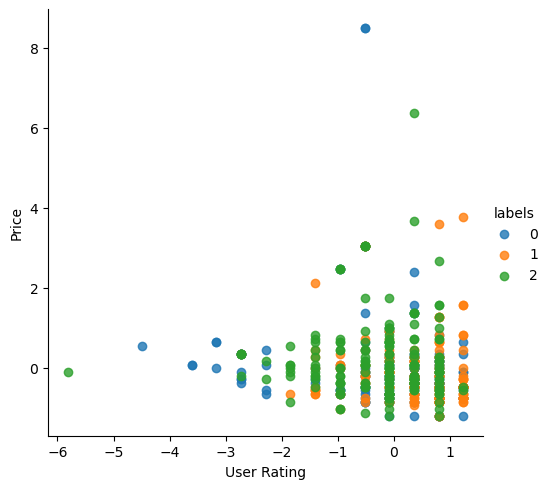

In [142]:
sns.lmplot(x='User Rating',y='Price',data=labelbook, hue='labels',fit_reg=False)

In [143]:
kmeans

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

#### 2.2 Finding the best K

In [144]:
import matplotlib.pyplot as plt

In [145]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 500,
    "random_state": 20,
}

Loop through different k to compute the silhouette score

In [146]:
silhouette_coefficients = []

for k in range(3, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(labelbook)
    score = silhouette_score(labelbook, kmeans.labels_)
    silhouette_coefficients.append(score)

image configuration
@Source: https://www.geeksforgeeks.org/change-axis-labels-set-title-and-figure-size-to-plots-with-seaborn/

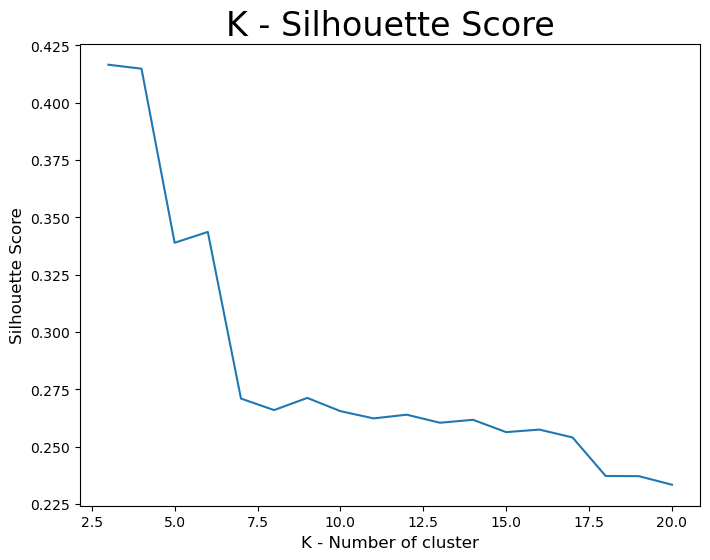

In [147]:
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = (8 , 6))
  
sns.lineplot( ax = ax , x = range(3, 21), y = silhouette_coefficients)
  
# Set label for x-axis
ax.set_xlabel( "K - Number of cluster" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Silhouette Score" , size = 12 )
  
# Set title for plot
ax.set_title( "K - Silhouette Score" , size = 24 )
  
# Display figure
plt.savefig("img/k_silhouette.png")
plt.show()

#### 2.3 Compare different K Visualization

In [148]:
kmeans_4 = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [149]:
kmeans_5 = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [150]:
kmeans_6 = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [151]:
kmeans_4.fit(book_c)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [152]:
kmeans_5.fit(book_c)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

In [153]:
kmeans_6.fit(book_c)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [154]:
labels_4 = pd.DataFrame(kmeans_4.labels_)
labelbook_4 = pd.concat((book_c, labels_4), axis = 1)
labelbook_4 = labelbook_4.rename({0:'labels'},axis=1)

In [155]:

labels_5 = pd.DataFrame(kmeans_5.labels_)
labelbook_5 = pd.concat((book_c, labels_5), axis = 1)
labelbook_5 = labelbook_5.rename({0:'labels'},axis=1)

In [156]:

labels_6 = pd.DataFrame(kmeans_6.labels_)
labelbook_6 = pd.concat((book_c, labels_6), axis = 1)
labelbook_6 = labelbook_6.rename({0:'labels'},axis=1)

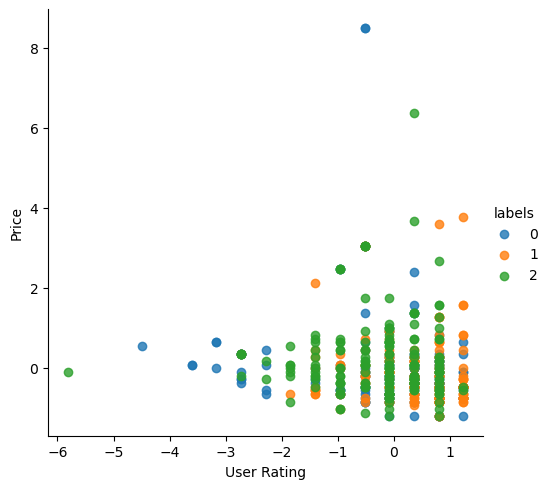

In [157]:
sns.lmplot(x='User Rating',y='Price',data=labelbook, hue='labels',fit_reg=False)

<AxesSubplot: xlabel='User Rating', ylabel='Price'>

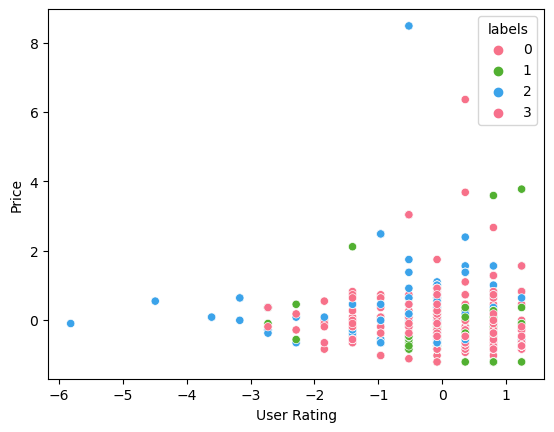

In [158]:
sns.scatterplot(x='User Rating',y='Price',data=labelbook_4, hue='labels', palette="husl")

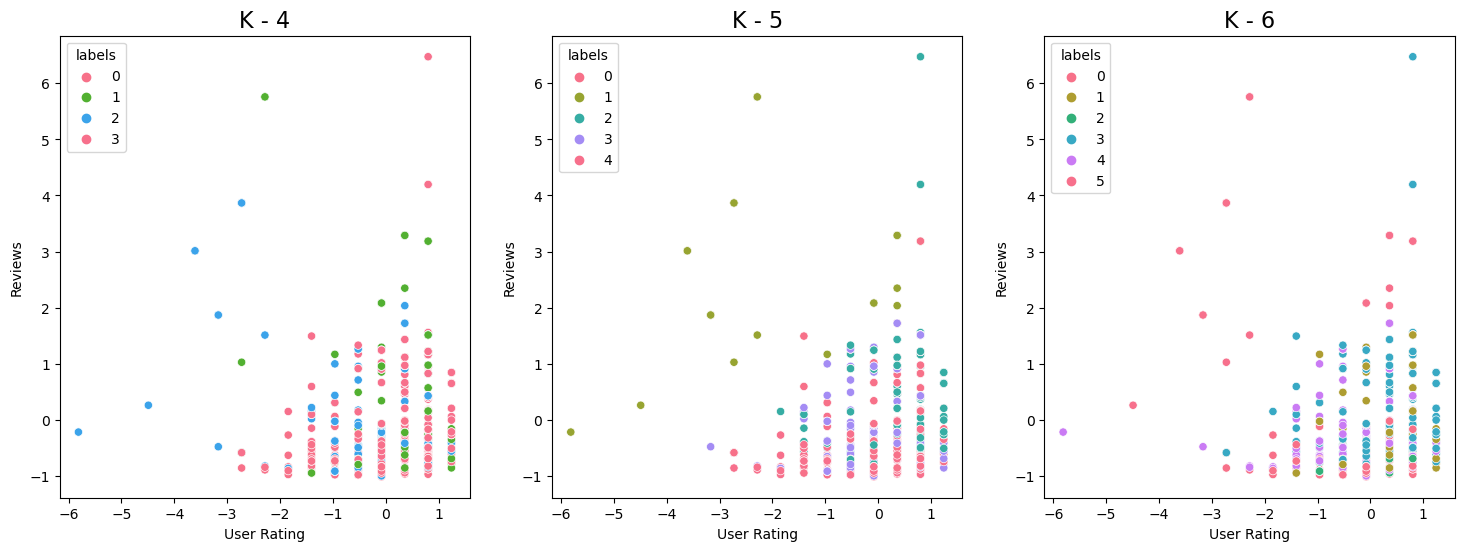

In [168]:
# Set figure size (width, height) in inches
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (18 , 6))
  

sns.scatterplot(ax = ax1, x='User Rating',y='Reviews',data=labelbook_4, hue='labels', palette="husl")
sns.scatterplot(ax = ax2, x='User Rating',y='Reviews',data=labelbook_5, hue='labels', palette="husl")
sns.scatterplot(ax = ax3, x='User Rating',y='Reviews',data=labelbook_6, hue='labels', palette="husl")
  
# Set label for x-axis
# ax.set_xlabel( "K - Number of cluster" , size = 12 )
  
# Set label for y-axis
# ax.set_ylabel( "Silhouette Score" , size = 12 )
  
# Set title for plot
ax1.set_title( "K - 4" , size = 16 )
ax2.set_title( "K - 5" , size = 16 )
ax3.set_title( "K - 6" , size = 16 )
  
# Display figure
plt.savefig("img/k_silhouette.png")
plt.show()